In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/yolo_v8

/content/drive/MyDrive/yolo_v8


In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 881.2/881.2 kB 30.0 MB/s eta 0:00:00


In [ ]:
!git clone https://github.com/ultralytics/ultralytics.git

fatal: destination path 'ultralytics' already exists and is not an empty directory.


In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="P2wIAZuxXm7ktiiVu4WS")
project = rf.workspace("parkingdetection-uitkc").project("parking-space-detection-bdjgi")
version = project.version(3)
dataset = version.download("yolov8")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.9/80.9 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.4 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...


In [ ]:
!ls

Parking-Space-Detection-3  runs  ultralytics  yolo11n.pt  yolov8n.pt


In [ ]:
%cd /content/drive/MyDrive/yolo_v8
!yolo task=detect mode=train model=/content/drive/MyDrive/yolo_v8/yolov8n.pt data=/content/drive/MyDrive/yolo_v8/Parking-Space-Detection-3/data.yaml epochs=85 imgsz=640 plots=True

/content/drive/MyDrive/yolo_v8
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics 8.3.28 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=/content/drive/MyDrive/yolo_v8/yolov8n.pt, data=/content/drive/MyDrive/yolo_v8/Parking-Space-Detection-3/data.yaml, epochs=85, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train9, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_rati

In [ ]:
from ultralytics import YOLO

In [ ]:
model = YOLO('/content/drive/MyDrive/yolo_v8/runs/detect/train9/weights/best.pt')
metrics = model.val()

Ultralytics 8.3.28 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,006,233 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/drive/MyDrive/yolo_v8/Parking-Space-Detection-3/valid/labels.cache... 35 images, 0 backgrounds, 0 corrupt: 100%|██████████| 35/35 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.01it/s]


                   all         35        704      0.952      0.636      0.978      0.812
                 empty         20        140      0.883      0.929      0.952      0.739
              occupied         35        563      0.974       0.98      0.988      0.702
          unidentified          1          1          1          0      0.995      0.995
Speed: 12.6ms preprocess, 6.4ms inference, 0.0ms loss, 6.1ms postprocess per image
Results saved to runs/detect/val5


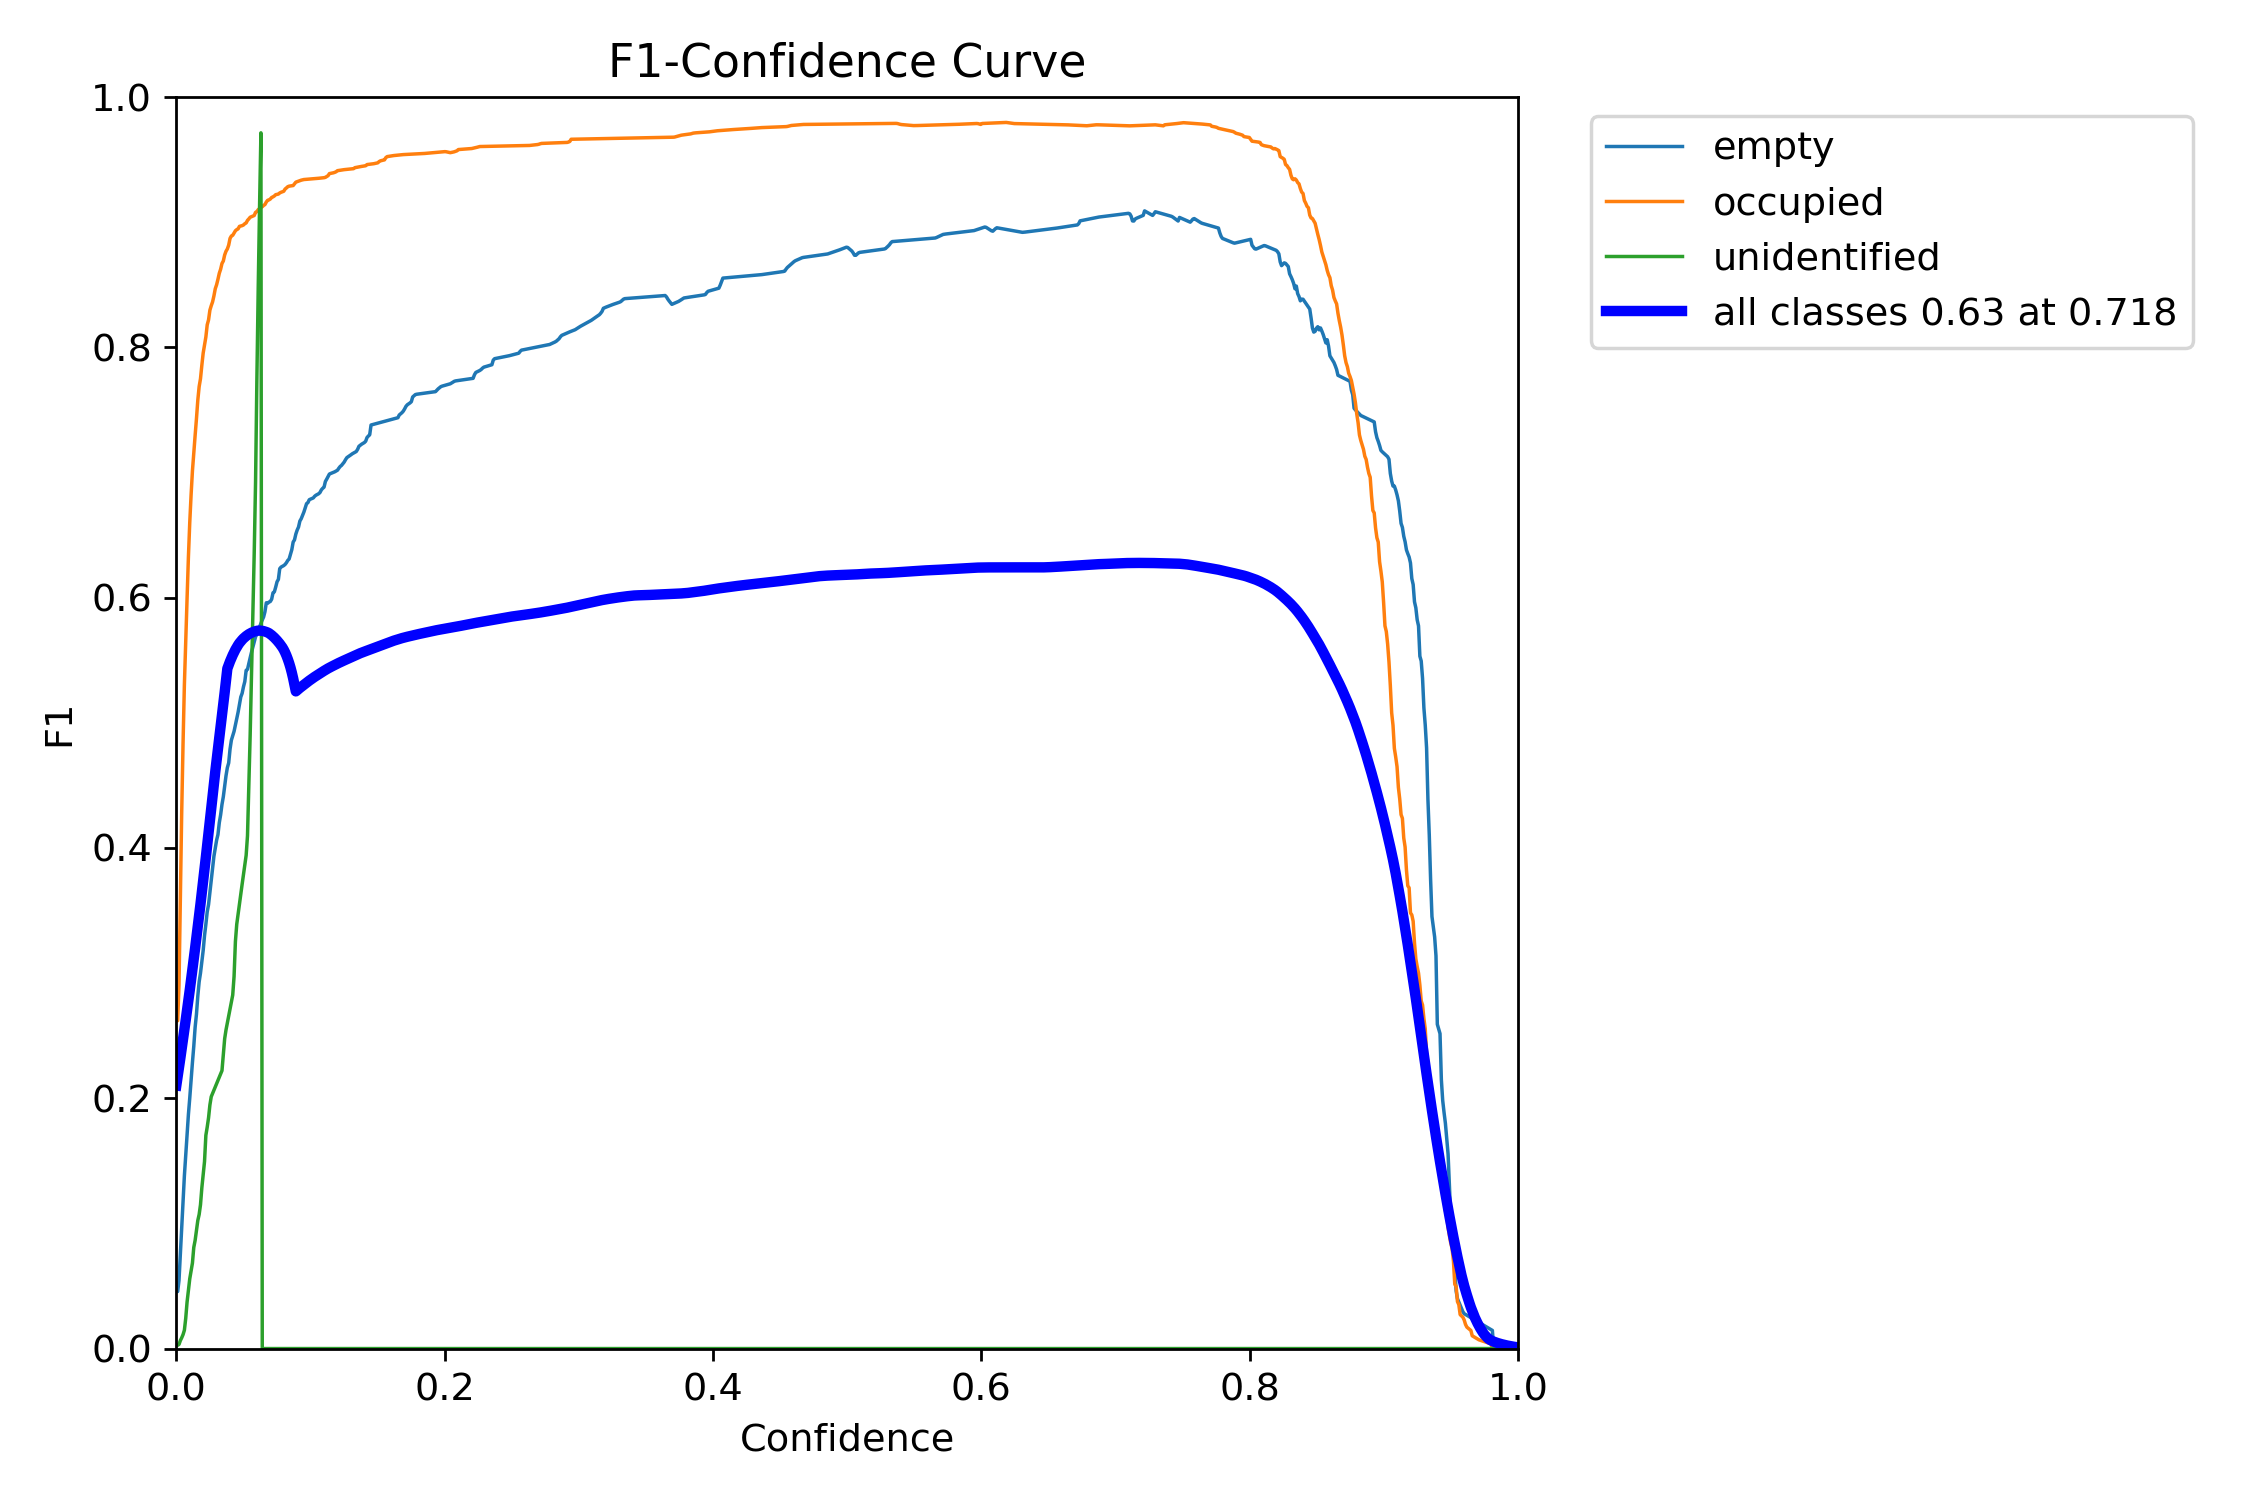

In [ ]:
Image('/content/drive/MyDrive/yolo_v8/runs/detect/train9/F1_curve.png')

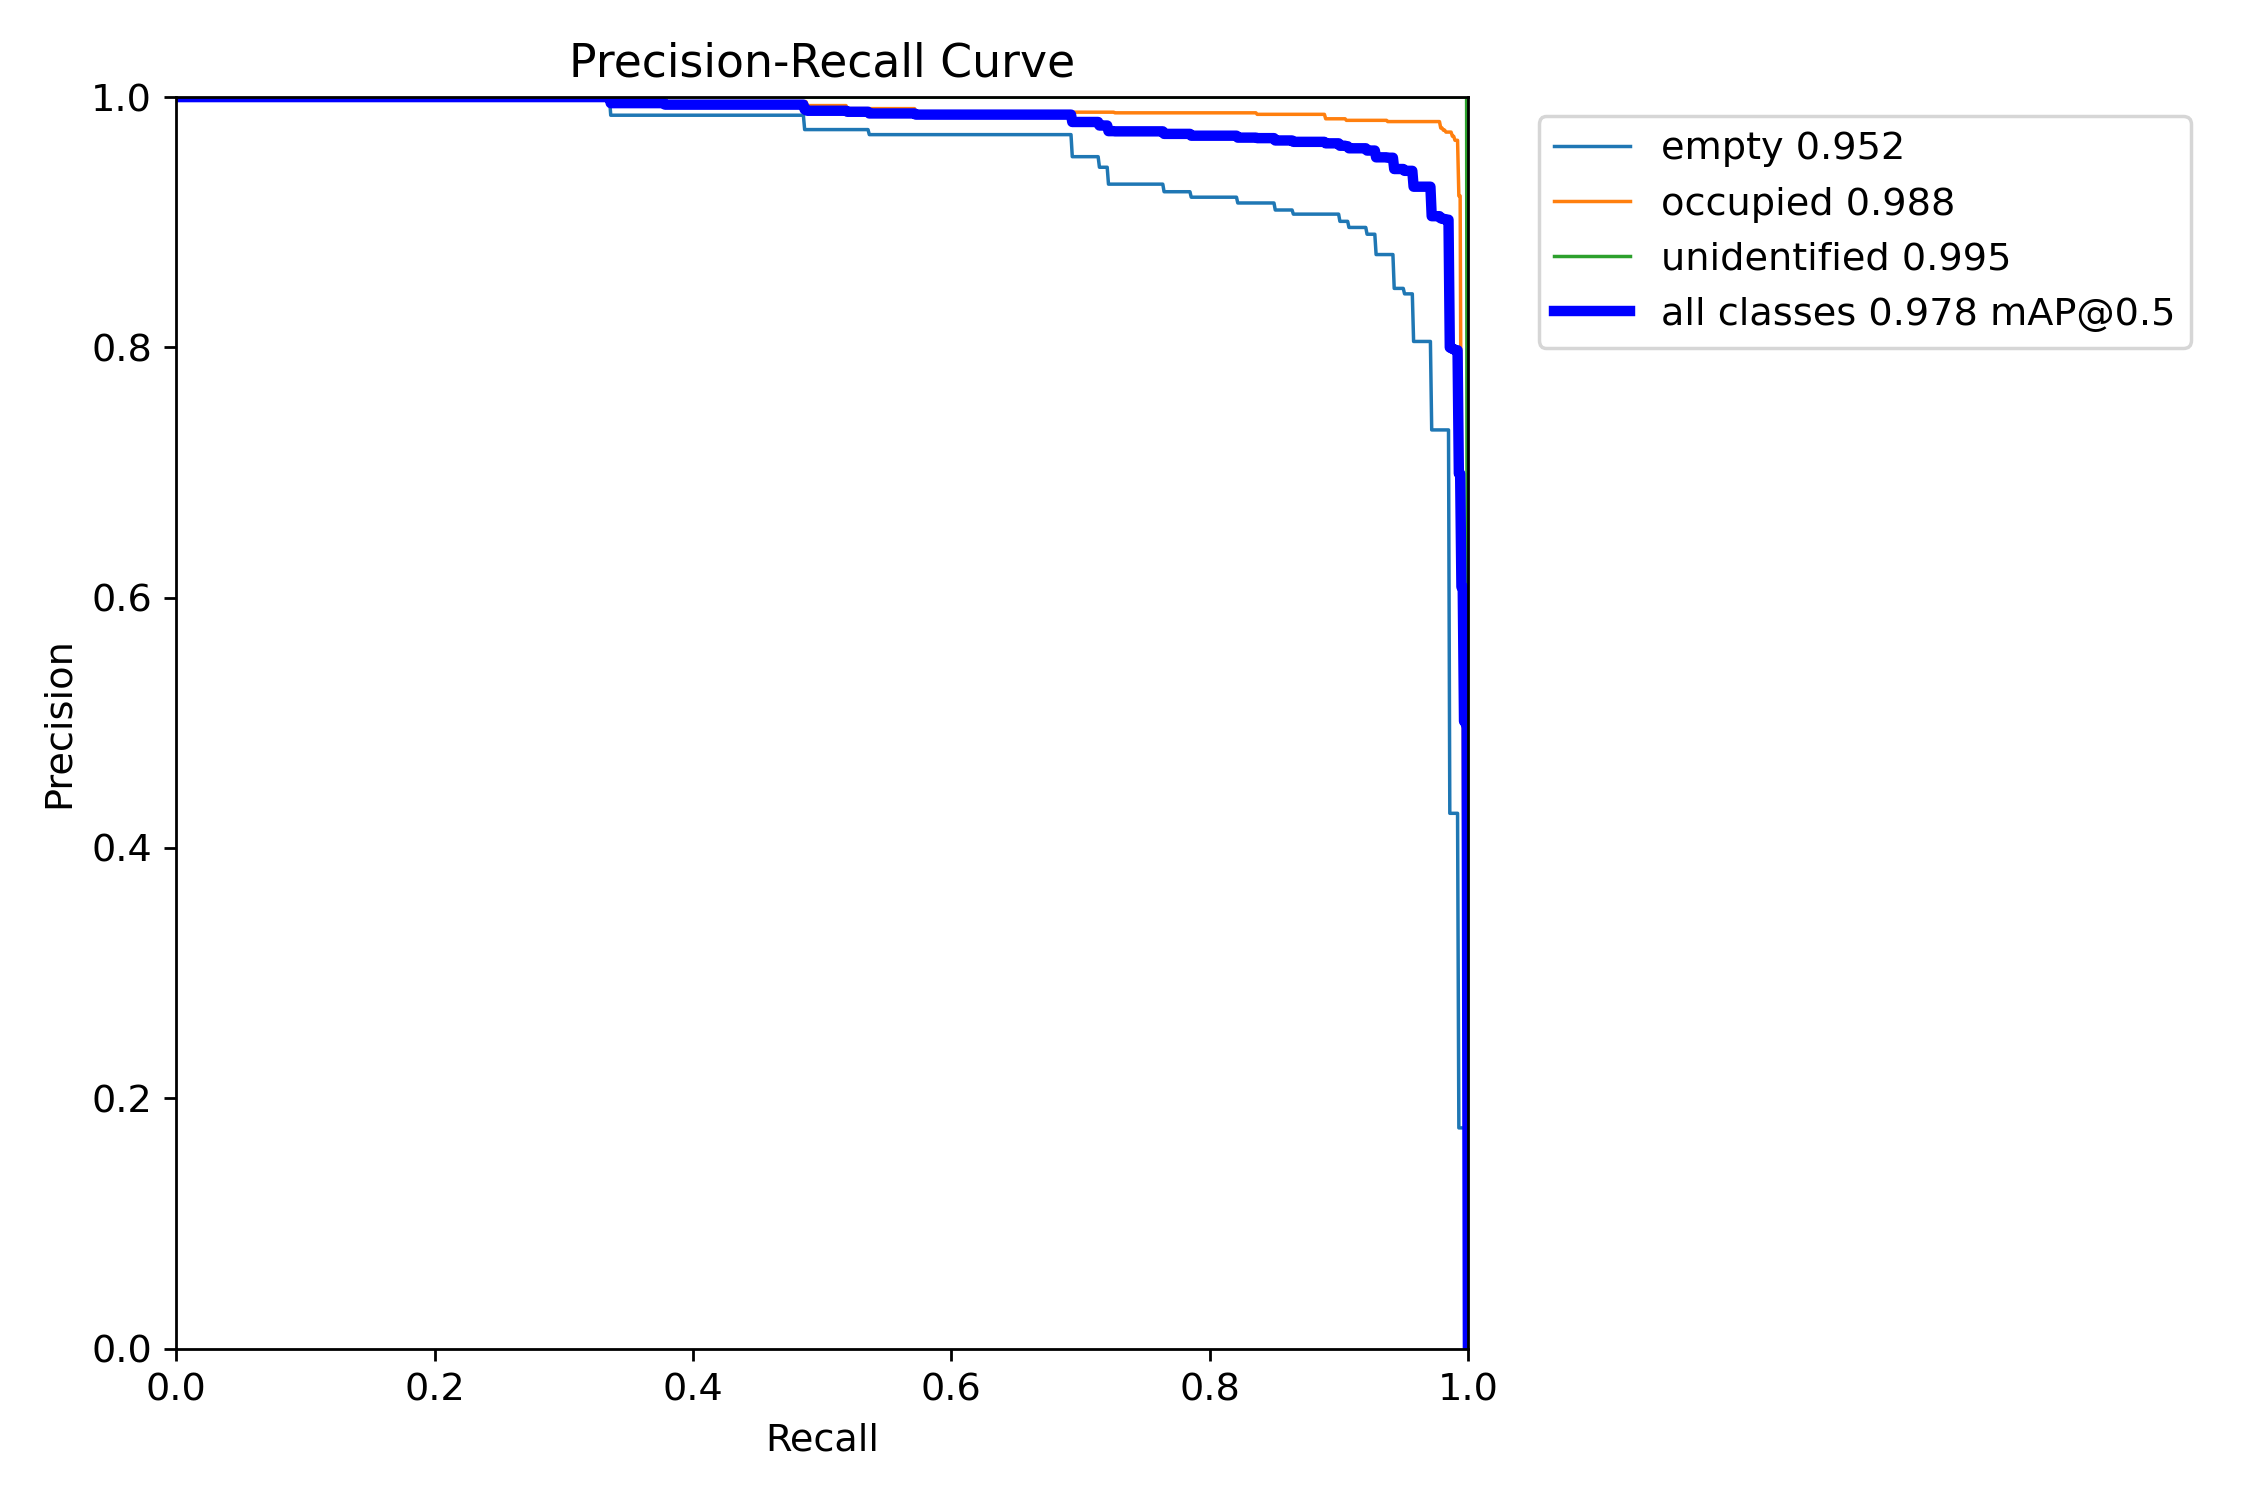

In [ ]:
Image('/content/drive/MyDrive/yolo_v8/runs/detect/train9/PR_curve.png')

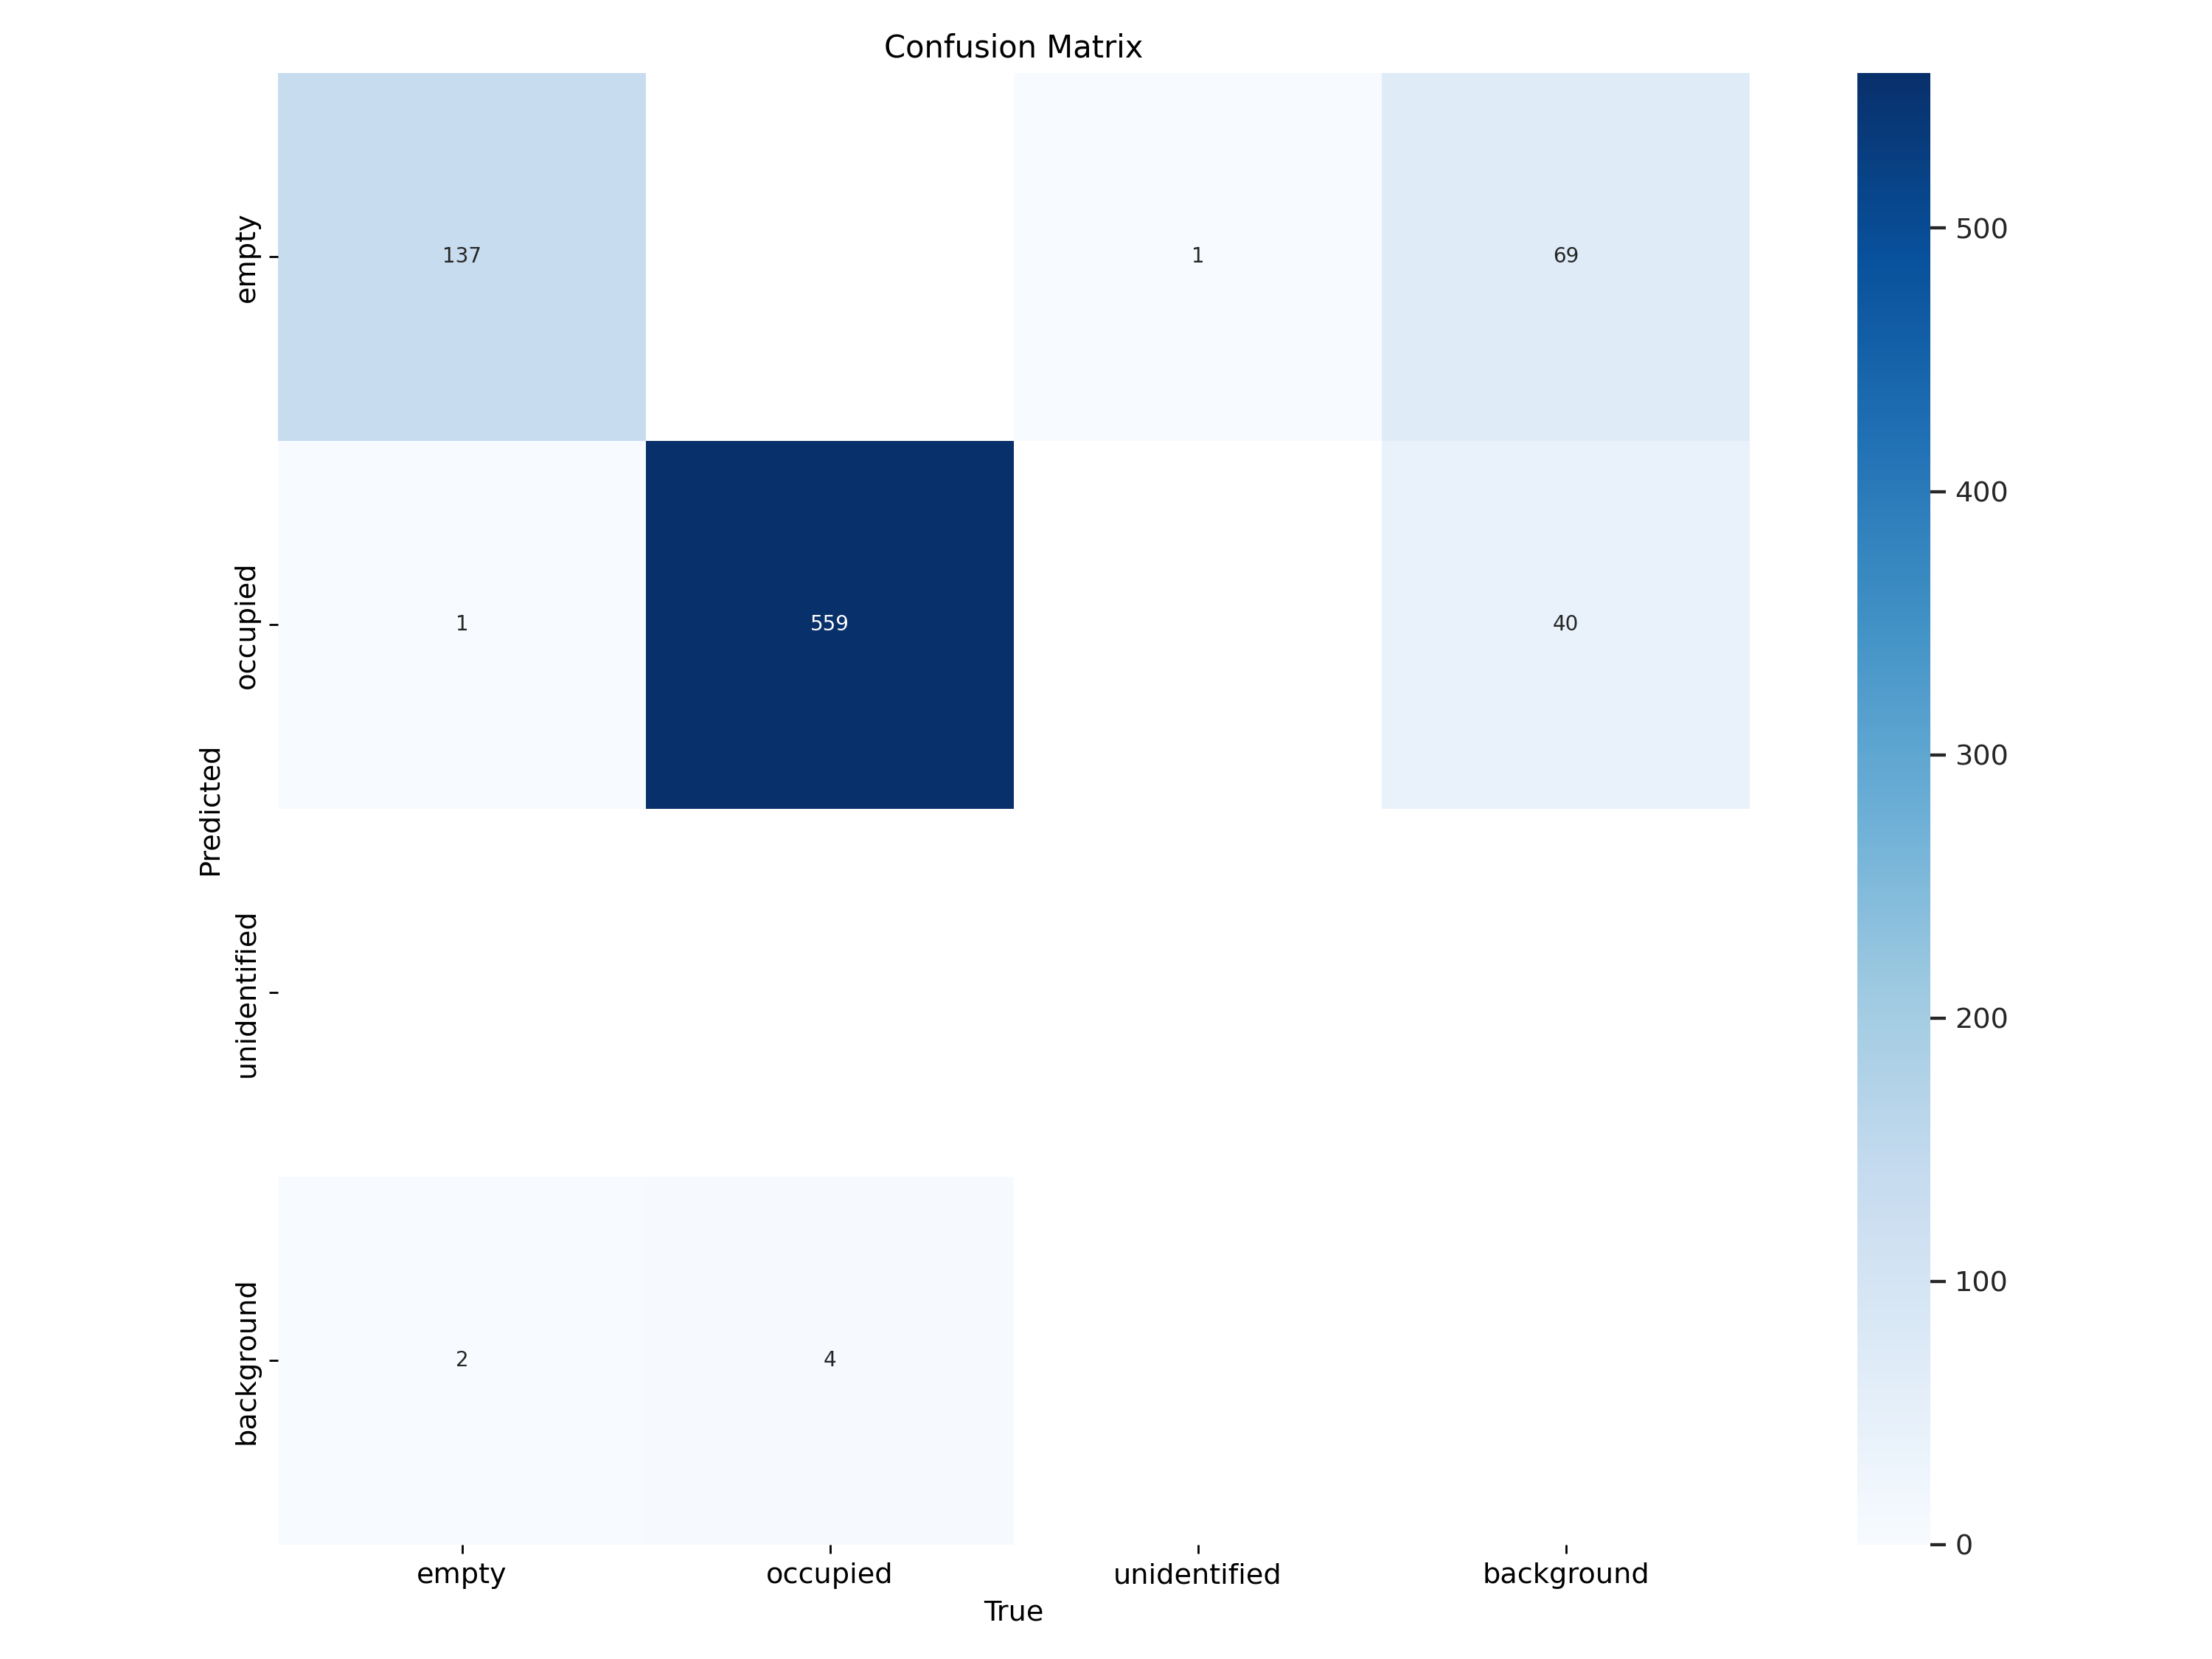

In [ ]:
display(Image(filename='/content/drive/MyDrive/yolo_v8/runs/detect/train9/confusion_matrix.png'))

In [ ]:
%cd /content/drive/MyDrive/yolo_v8
!yolo task=detect mode=train model=/content/drive/MyDrive/yolo_v8/yolo11n.pt data=/content/drive/MyDrive/yolo_v8/Parking-Space-Detection-3/data.yaml epochs=85 imgsz=640 plots=True

/content/drive/MyDrive/yolo_v8
Ultralytics 8.3.28 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=/content/drive/MyDrive/yolo_v8/yolo11n.pt, data=/content/drive/MyDrive/yolo_v8/Parking-Space-Detection-3/data.yaml, epochs=85, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train10, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_fram

In [ ]:
from IPython import display
display.clear_output()
from IPython.display import display,Image

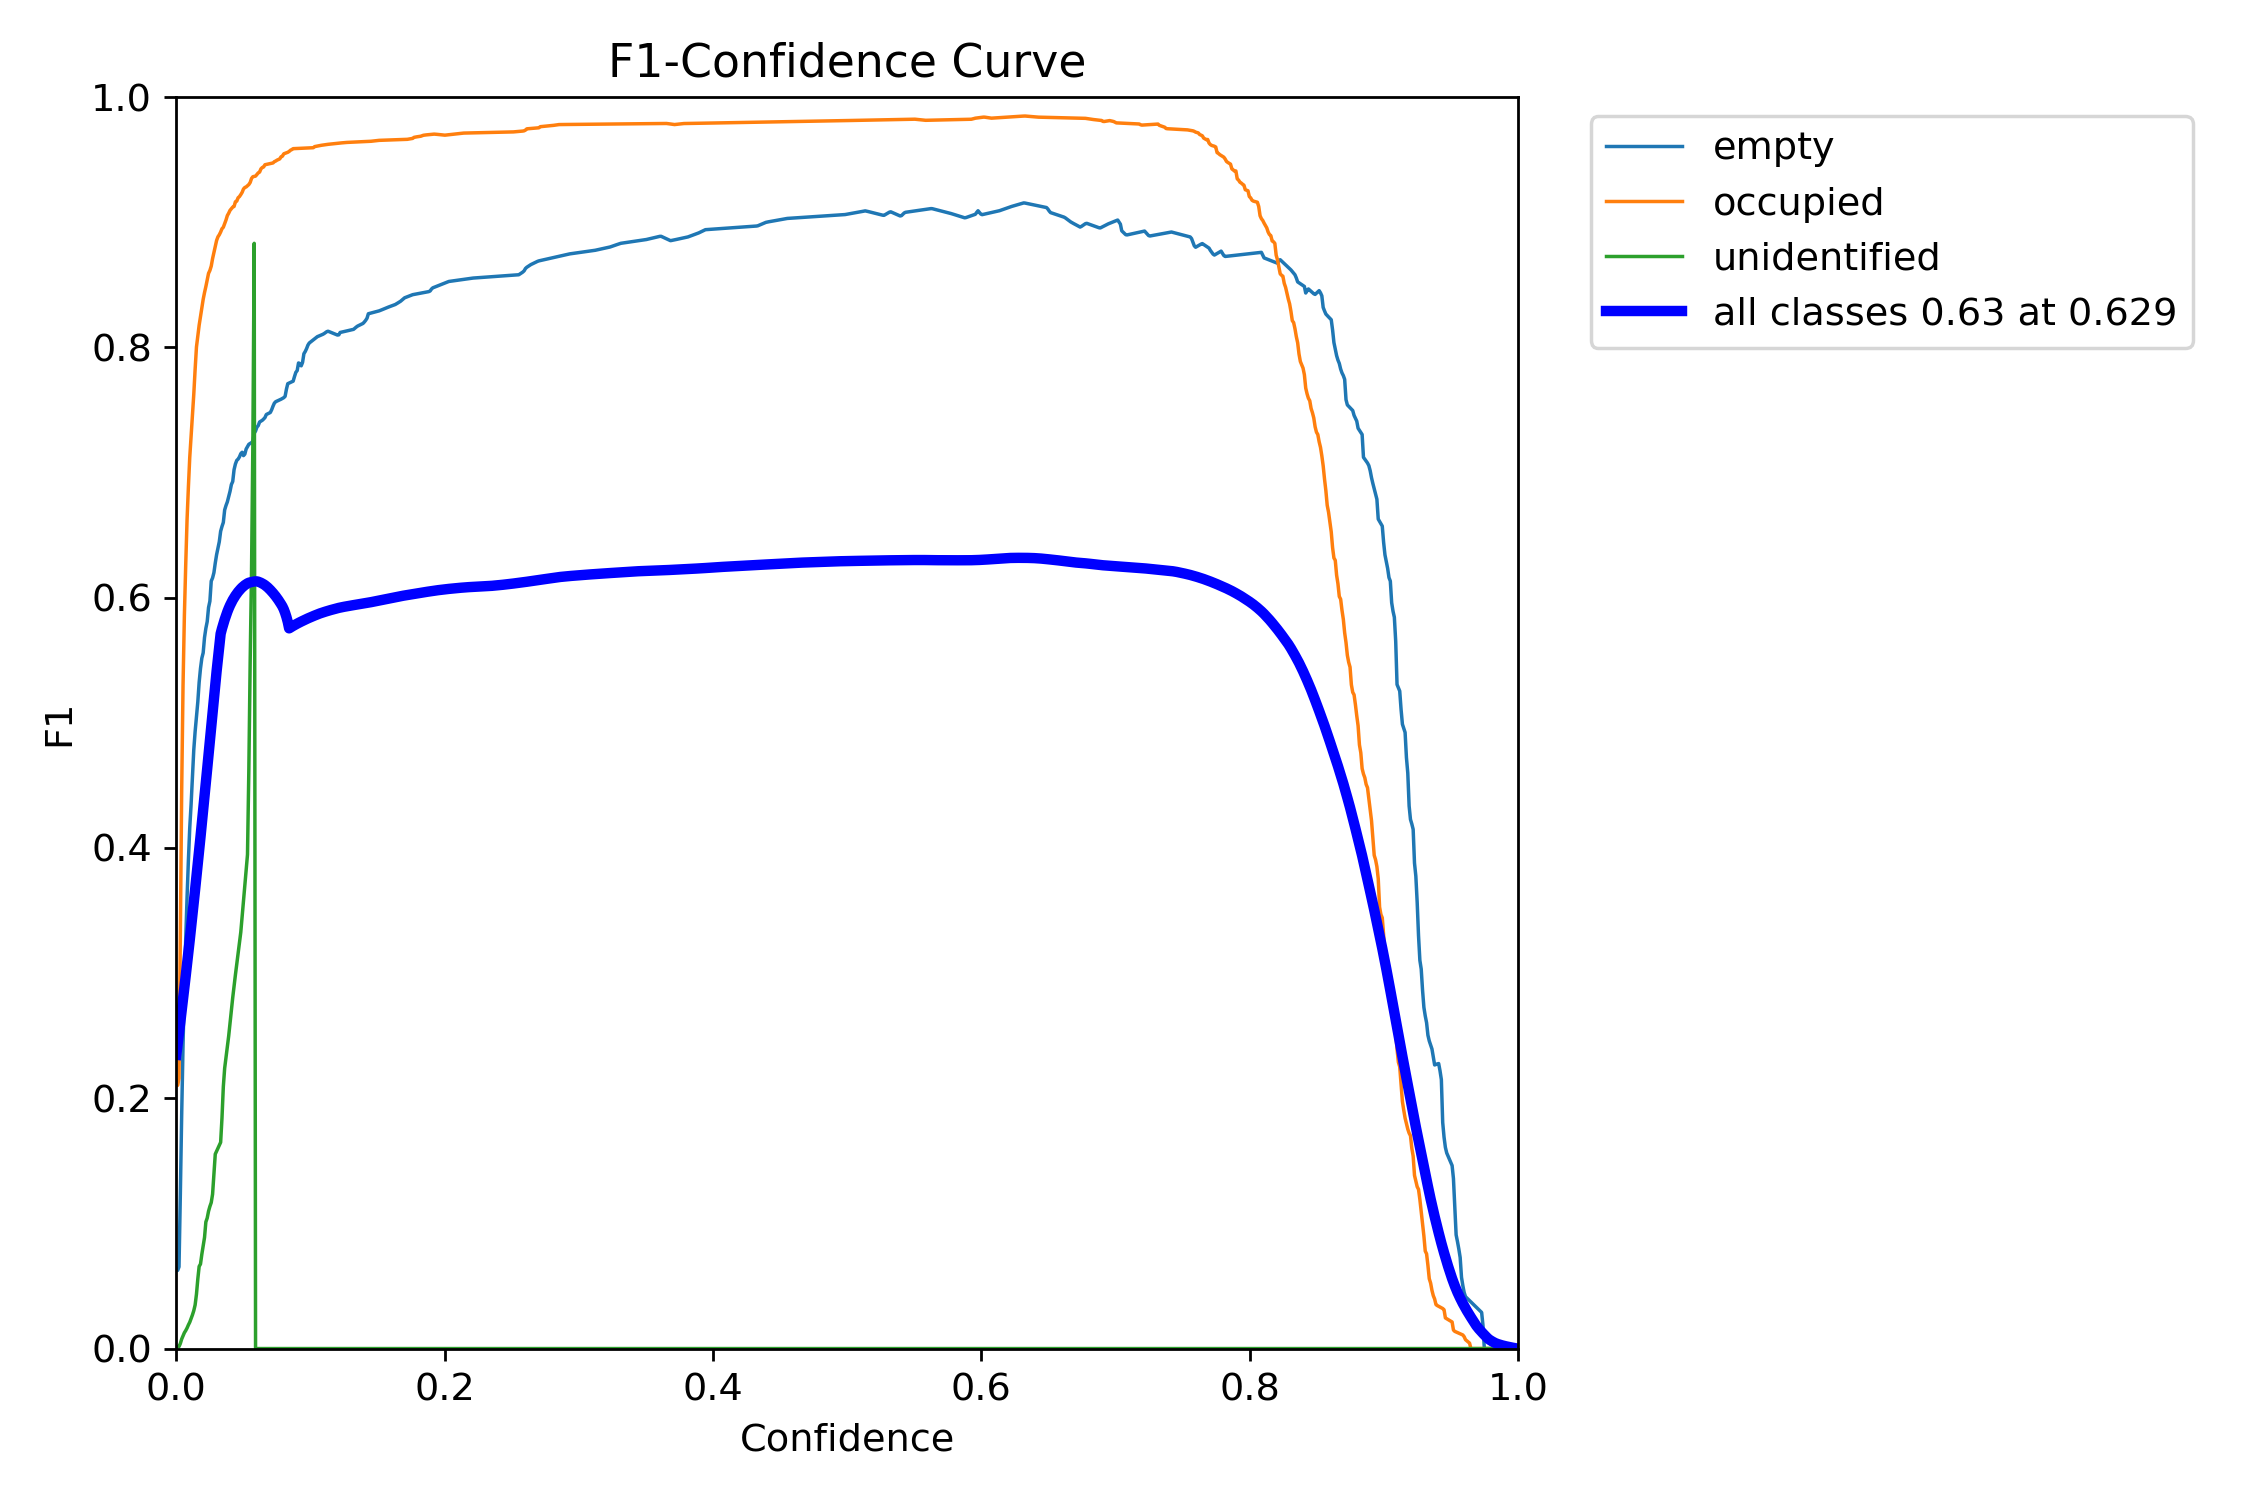

In [ ]:
Image('/content/drive/MyDrive/yolo_v8/runs/detect/train10/F1_curve.png')

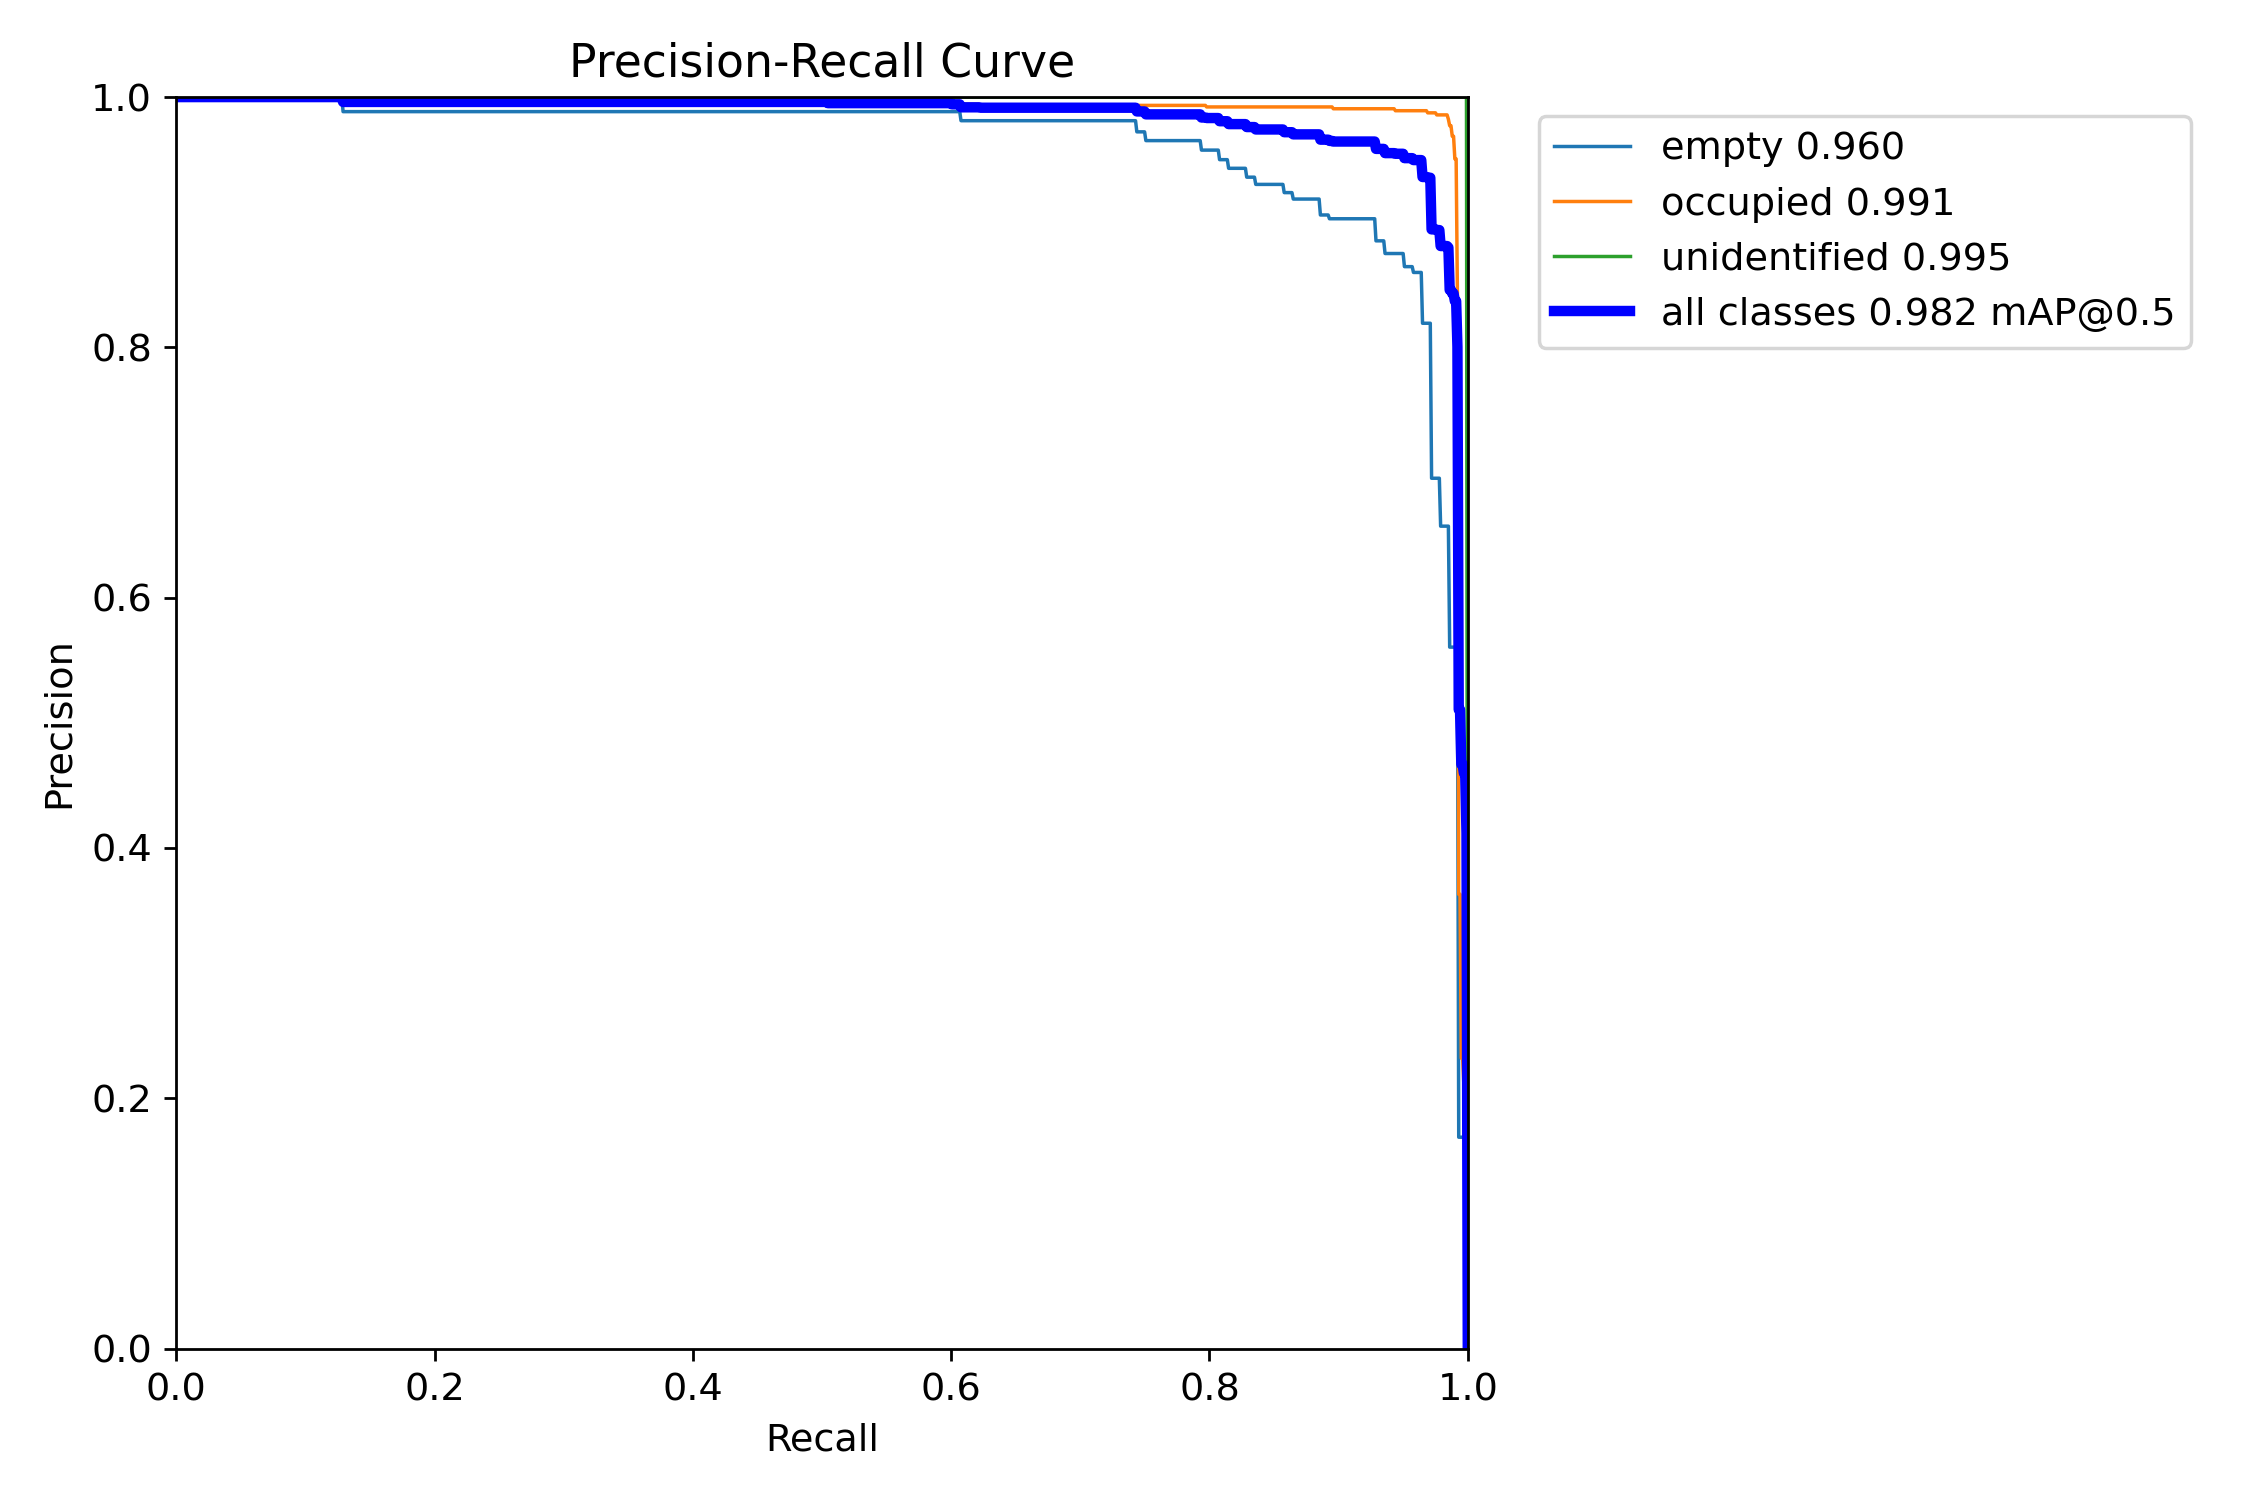

In [ ]:
Image('/content/drive/MyDrive/yolo_v8/runs/detect/train10/PR_curve.png')

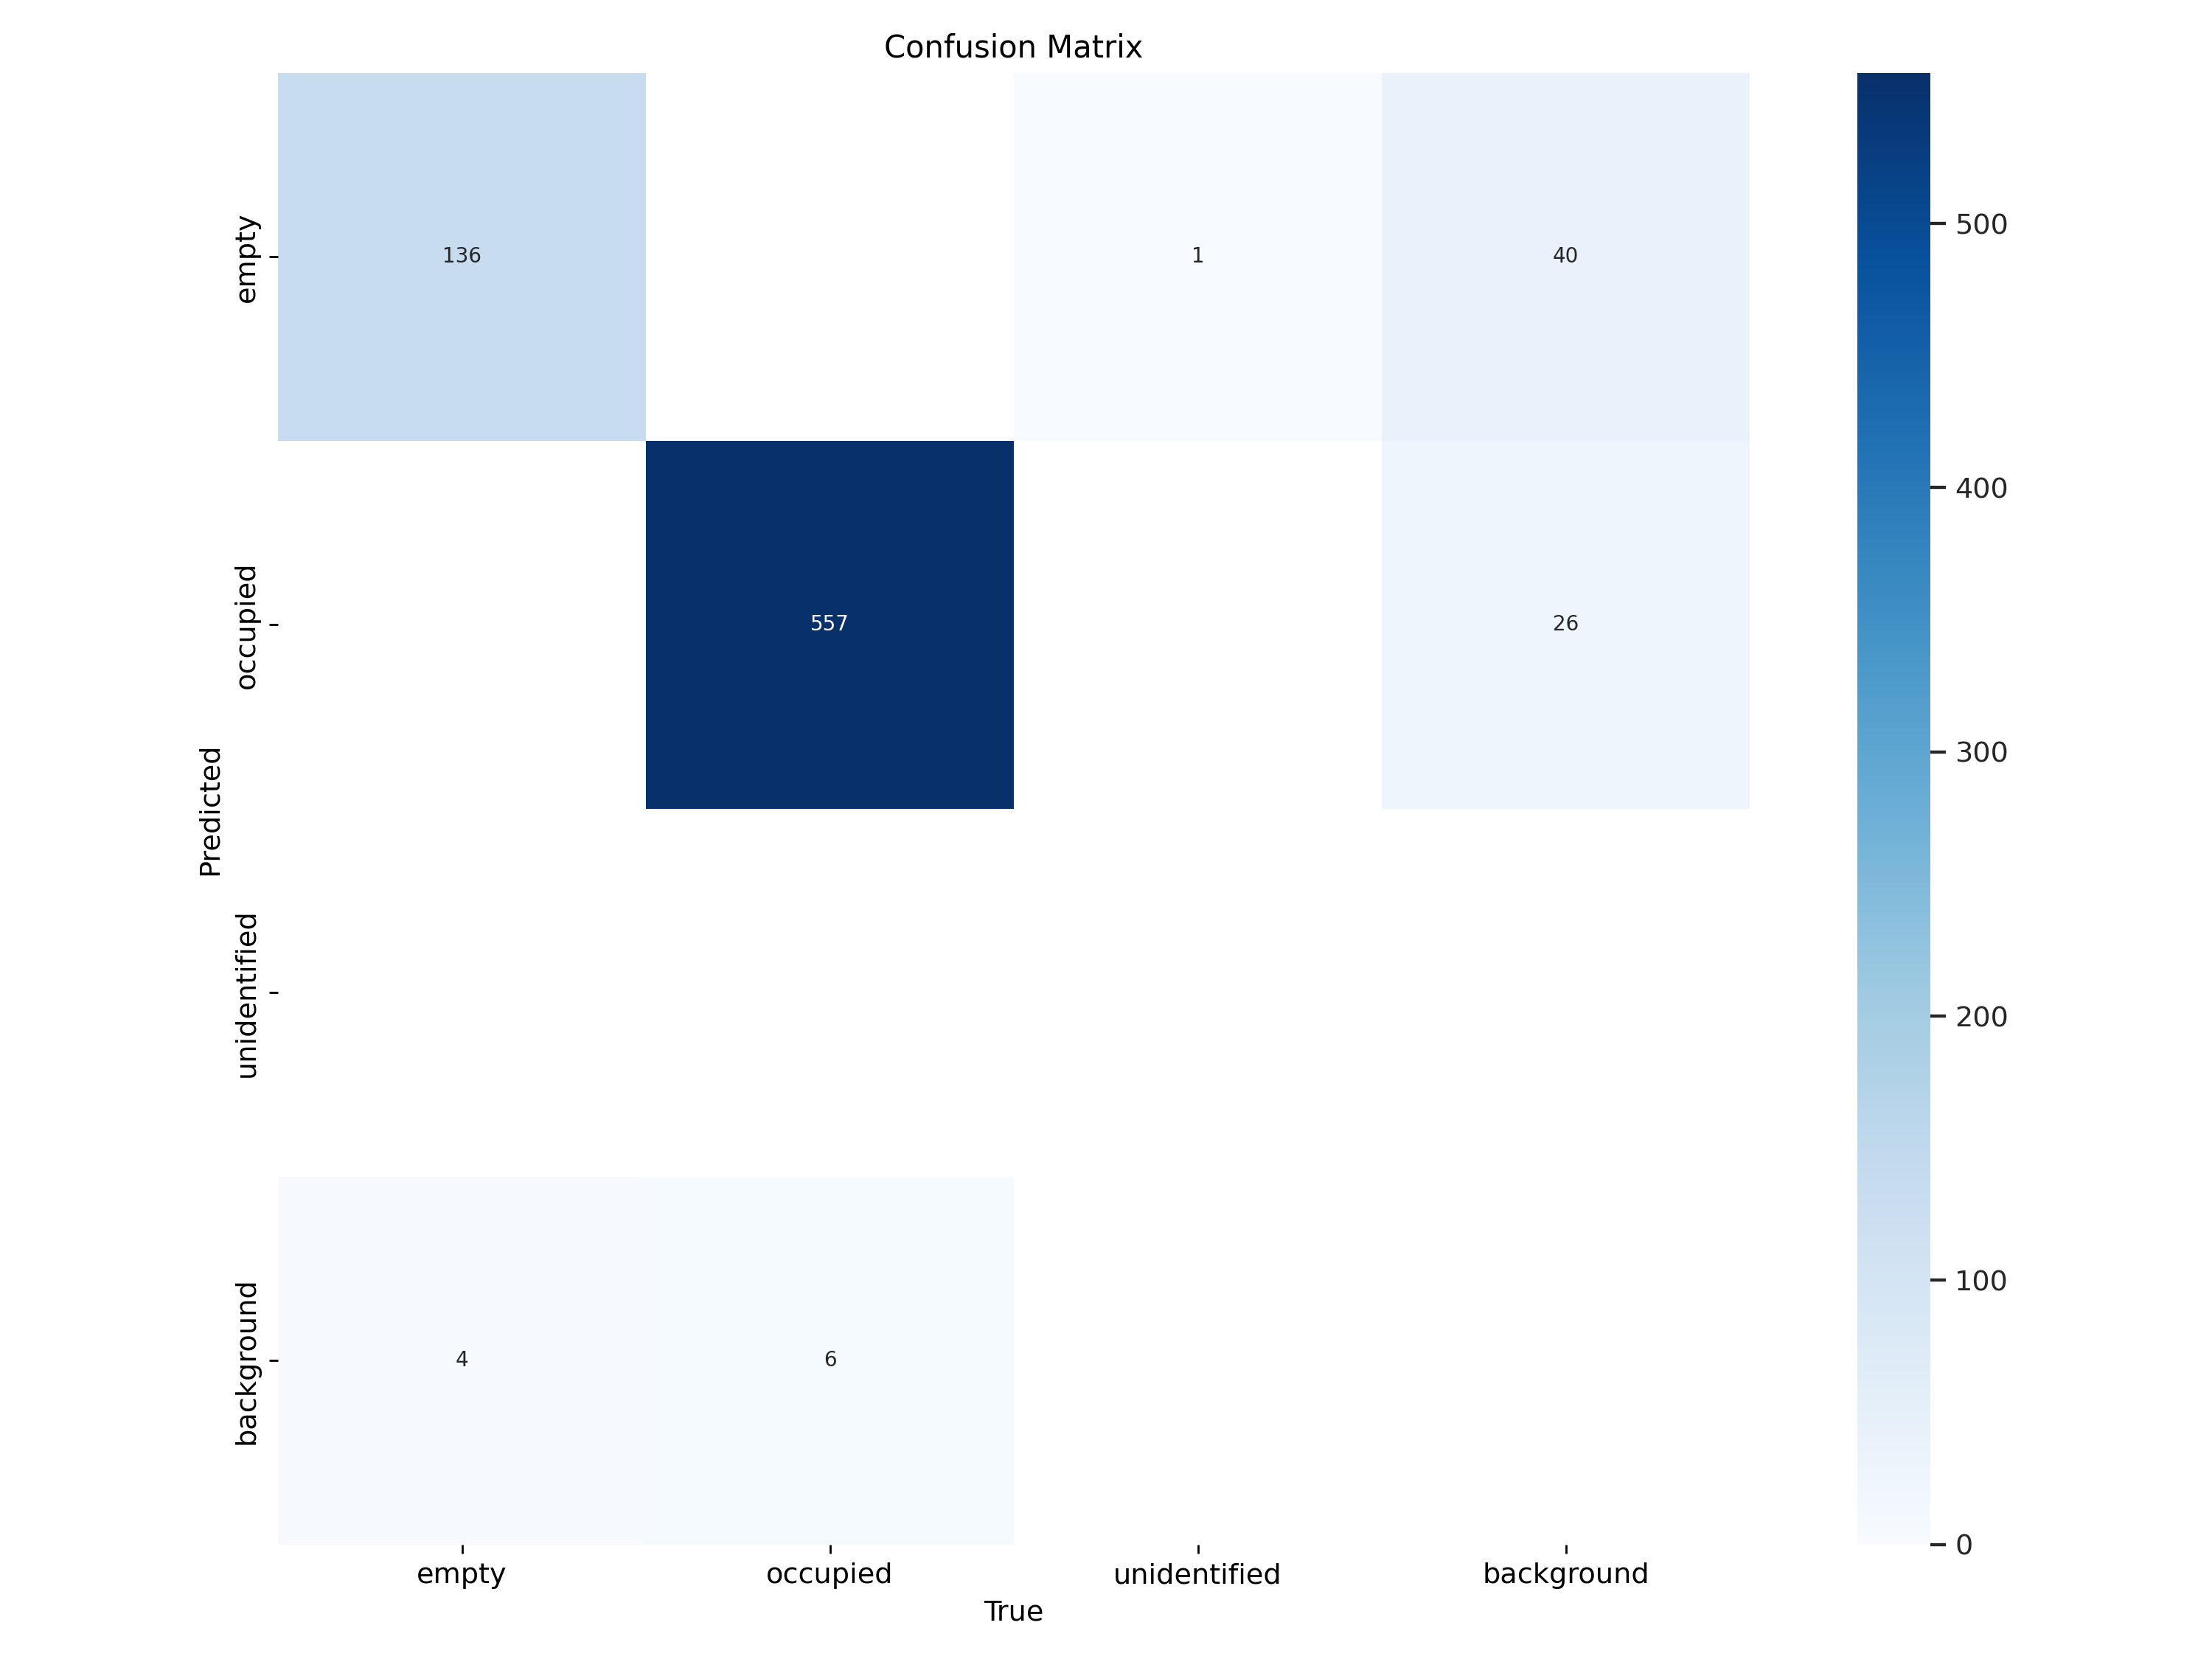

In [ ]:
display(Image(filename='/content/drive/MyDrive/yolo_v8/runs/detect/train10/confusion_matrix.png'))

In [ ]:
import torch
from pathlib import Path
from PIL import Image
import matplotlib.pyplot as plt